<b>Random generators</b>
- A pseudorandom number generator (<b>PRNG</b>), also known as a deterministic random bit generator (<b>DRBG</b>), is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers. 
- The PRNG-generated sequence is not truly random.
- It is completely determined by an initial value, called the seed (which may include truly random values).
- If we invoke the generator twice with the same seed, the sequence of numbers that will be generated starting from that seed will always be the same. 
- Most notably, these numbers will be evenly distributed.
- PRNGs are applied applications such as simulations (e.g. for the Monte Carlo method), electronic games (e.g. for procedural generation), and cryptography (see https://en.wikipedia.org/wiki/Pseudorandom_number_generator).

- So let us investigate the most common Python pseudo-random number generation methods.

<b>The random.random() function</b> 
- The random.random() function returns the next nearest floating-point value from the generated sequence.
- The range of the returned values is between 0 and 1.0.

In [1]:
# Let's import a few 'prerequisite' libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We use the 'random' function.
import random
random_list_1 = [] # Initialize a list to hold the random numbers.
for i in range(20): # This will give us 20 numbers(remember Python uses zero-indexing). Count from 0-19.
    random_list_1.append(round(random.random(), 5)) # Output is rounded to 5 digits.  
print('The list has {} random numbers!\n'.format(len(random_list_1)))
print('Here is the first list:\n\n', random_list_1)

random_list_2 = [] # Initialize a list to hold the random numbers.
for i in range(20): # This will give us 20 numbers(remember Python uses zero-indexing). Count from 0-19.
    random_list_2.append(round(random.random(), 5)) # Output is rounded to 5 digits.  
print('The list has {} random numbers!\n'.format(len(random_list_2)))
print('Here is the second list:\n\n', random_list_2)

The list has 20 random numbers!

Here is the first list:

 [0.7646, 0.26933, 0.50279, 0.85482, 0.6893, 0.67443, 0.93893, 0.03955, 0.4579, 0.21954, 0.86403, 0.48189, 0.71411, 0.87003, 0.33155, 0.6297, 0.77429, 0.26085, 0.25173, 0.45863]
The list has 20 random numbers!

Here is the second list:

 [0.19711, 0.97986, 0.84745, 0.68027, 0.65033, 0.58297, 0.33455, 0.7013, 0.86737, 0.13664, 0.93964, 0.10776, 0.14964, 0.30928, 0.95407, 0.05691, 0.24934, 0.5435, 0.61524, 0.61136]


- Evidently, the two lists contain different numbers.
- To see that we are sampling from a uniform distribution we need to increase the population in the list. 

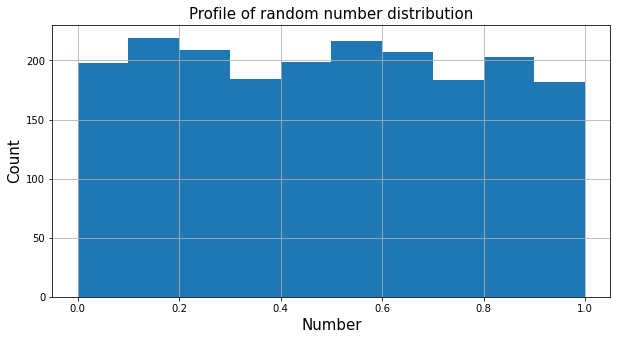

In [3]:
# Let's investigate if the generated numbers are from a uniform distribution.
# We increase the number of values in our list to view the distribution properly.
random_list_extended = [] # Initialize a list to hold the random numbers.
for i in range(2000): # This will give us 20 numbers(remember Python uses zero-indexing). Count from 0-19.
    random_list_extended.append(round(random.random(), 5))

# Plot code starts here.
plt.figure(figsize = (10, 5))
plt.hist(random_list_extended)
plt.xlabel('Number', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Profile of random number distribution', fontsize = 15)
plt.grid()
plt.show()

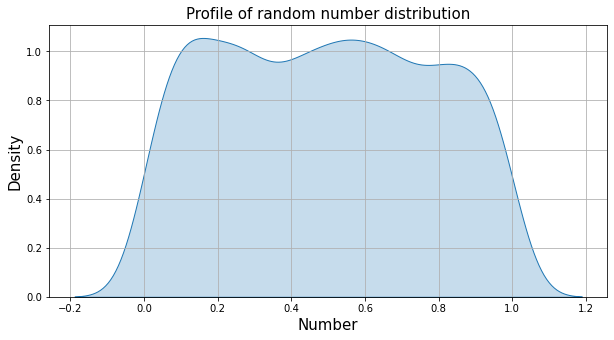

In [4]:
# Include a profile for good measure :)
plt.figure(figsize = (10, 5))
sns.kdeplot(random_list_extended, shade = True)
plt.xlabel('Number', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Profile of random number distribution', fontsize = 15)
plt.grid()
plt.show()

- We see that the list is formed from a uniform distribution.
- Also, we note that the numbers are between 0 and 1.


- Let us continue with generating more random numbers.
- We will now produce the same random numbers per cycle of our PRNG by specifying the seed.
- If this optional argument is omitted, the current system time is used. 
- The current system time is also used to initialize the generator when the module is imported for the first time.

In [5]:
random.seed(5)
random_seeded_list = [] # Empty list.
for i in range(20):
    random_seeded_list.append(random.random())
    random_seeded_list_rounded = [round(elem, 5) for elem in random_seeded_list] # format of only 5 digits.
print('Here is our seeded list: \n\n', random_seeded_list_rounded)

Here is our seeded list: 

 [0.6229, 0.74179, 0.79519, 0.94245, 0.7399, 0.92232, 0.02901, 0.46562, 0.94336, 0.64897, 0.9009, 0.11321, 0.46907, 0.24657, 0.54376, 0.57394, 0.01311, 0.21673, 0.27948, 0.91635]


- <b>Can we reproduce the same list?</b>

In [6]:
# Use the same seed to reproduce the same list.
random.seed(5)
random_seeded_list_2 = [] # Empty list.
for i in range(20):
    random_seeded_list_2.append(random.random())
    random_seeded_list_rounded_2 = [round(elem, 5) for elem in random_seeded_list_2] # format of only 5 digits.
print('Here is our seeded list: \n\n', random_seeded_list_rounded_2)

Here is our seeded list: 

 [0.6229, 0.74179, 0.79519, 0.94245, 0.7399, 0.92232, 0.02901, 0.46562, 0.94336, 0.64897, 0.9009, 0.11321, 0.46907, 0.24657, 0.54376, 0.57394, 0.01311, 0.21673, 0.27948, 0.91635]


<b>To answer the last question-empahtically 'Yes', we can!</b>

<b>The random.uniform() function</b>
- The random.uniform() function generates numbers within a user-defined numeric range (unlike the 0-1 range of the random.random() function)

In [7]:
custom_random_list = []
for i in range(20):
    custom_random_list.append(random.uniform(1, 100))
    custom_random_list_rounded = [round(elem, 4) for elem in custom_random_list] # Round off the elements of the list to 4 decimal places.
print('This is a user defined list:\n\n', custom_random_list_rounded)

This is a user defined list:

 [76.8068, 16.8008, 79.9176, 14.738, 62.1278, 13.5432, 1.1757, 87.2691, 21.7362, 22.3326, 98.2597, 87.3684, 29.6412, 96.1863, 54.3831, 68.1052, 21.2732, 94.1566, 69.3736, 96.6899]


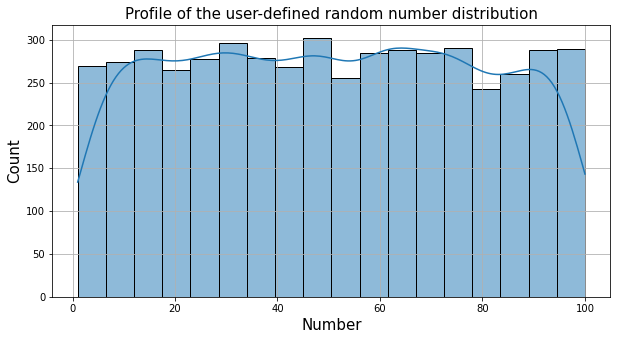

In [8]:
# Let's investigate the profile of the generated numbers.
custom_random_list_2 = []
for i in range(5000): # Careful with loops defined this way-computationally expensive.
    custom_random_list_2.append(random.uniform(1, 100))
    custom_random_list_rounded_2 = [round(elem, 4) for elem in custom_random_list_2] # Round off the elements of the list to 4 decimal places.

# Plot the profile.
plt.figure(figsize = (10, 5))
sns.histplot(custom_random_list_rounded_2, kde = True)
plt.xlabel('Number', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Profile of the user-defined random number distribution', fontsize = 15)
plt.grid()
plt.show()

<b>The random.randint() function</b>
- This function generates random integers.
- The arguments for randint() are the values of the range, <b>including</b> the extremes.
- The numbers may be negative or positive, but the first value should be less than the second.

In [9]:
random_integers_list = []
for i in range(20):
    random_integers_list.append(random.randint(-100, 100))
print('Generated list of random integers:\n\n', random_integers_list)

Generated list of random integers:

 [27, -10, 18, -7, -90, -46, -20, 49, 97, -19, 64, -79, 31, 31, -72, 93, -87, -16, -33, 22]


- Let's check the profile of the generated numbers.

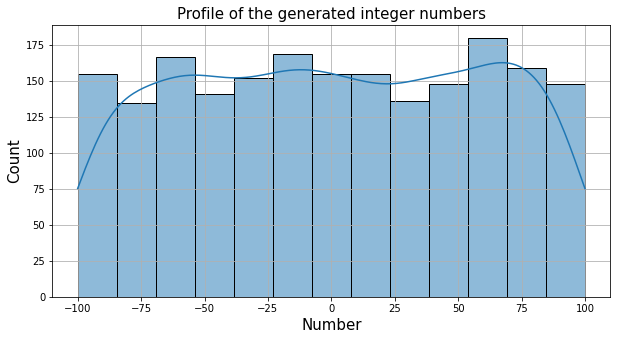

In [10]:
random_integers_list_2 = []
for i in range(2000):
    random_integers_list_2.append(random.randint(-100, 100))

# Plot the profile.
plt.figure(figsize = (10, 5))
sns.histplot(random_integers_list_2, kde = True)
plt.xlabel('Number', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Profile of the generated integer numbers', fontsize = 15)
plt.grid()
plt.show()

- The profile is that of a uniform distribution, as expected.
- The entire range is represented in the sequence of randomly generated numbers.

<b>The random.range() function</b>
- This function allows us to specify the 'step' between successive generated numbers.
- The returned sequence is a random distribution of the values expected from the passed arguments.
- Only the end number (the specified maximum) is omitted from the generated list.

In [11]:
for i in range(20):
    print(random.randrange(0, 100, 5), end=' ') # The 'end' arguments dictates how the results are separated.
print()

75 35 95 70 20 70 55 10 85 25 40 65 90 90 40 80 70 75 70 35 


<b>The random.choice() function</b>
- The <b>choice()</b> function returns a random element of the non-empty sequence passed as an argument.
- The set may contain either integers, float or non-numeric elements.
- You can select elements from a Python list containing any type of data.

In [12]:
colors_list = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet', 'Grey', 'Scarlet', 'Purple', 'Tan']
for i in range(5): # Argument is how many elements of the list you want to output.
    color_item = random.choice(colors_list)
    print ("Randomly selected color is: \n ", color_item)

Randomly selected color is: 
  Grey
Randomly selected color is: 
  Purple
Randomly selected color is: 
  Yellow
Randomly selected color is: 
  Indigo
Randomly selected color is: 
  Scarlet


- Remember to use the seed argument for reproducibility.

<b>The random.sample() function</b>
- Most of the time we want random samples from a population of input values.
- The <b>random.sample()</b> function generates samples without repeating the values and without changing the input sequence.
- Let's investigate its use.

In [13]:
values_list = range(10, 100, 5) # format is (start, stop, step).
print("Initial list of values:\n",values_list)
sample_values = random.sample(values_list, k = 10) # k is the number of samples you want.
print("\nSamples from the list:\n", sample_values)

Initial list of values:
 range(10, 100, 5)

Samples from the list:
 [35, 85, 40, 60, 30, 90, 10, 15, 70, 80]


<b>Summary</b>
- We are now familiar with the main Python functions for generating random numbers: random, seed, uniform, randint, choice, and sample.
- Happy coding!